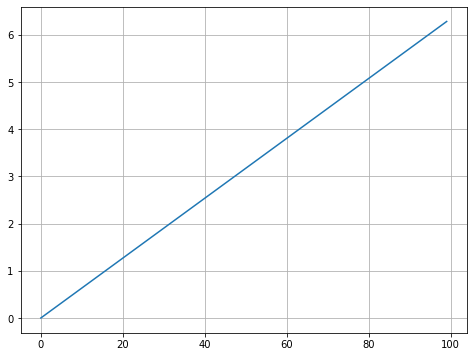

In [42]:
# In this notebook we will solve a Gaussian regression problem, learning the function given a set of mappings.
# Following the intuition strategy behind the Gaussian processes.
# Reference: https://towardsdatascience.com/understanding-gaussian-process-the-socratic-way-ba02369d804
# Reference: https://katbailey.github.io/post/gaussian-processes-for-dummies/
# We will use that data as a prior and then see if a Gaussian process can sample from that data.
# And we will see if the GP can come up with a function to explain the mappings (cosidering those mappings are priors)
# We will first figure out K_** from the sample points, Cholesky decompose it 
# Pass it through the multivariate distribution
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.distributions as tfd
%matplotlib inline


n = 100 # 100 sample points
X = tf.placeholder(shape=[None, 1], dtype=tf.float64)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float64)
x_train = np.linspace(0, 2*np.pi, n).reshape(-1, 1)
y_train = np.sin(x_train)
x_test = np.linspace(0, 2*np.pi, 100).reshape(-1, 1)
y_test = np.sin(x_test)
plt.figure(figsize=(8,6))
plt.plot(x_train, "-")
plt.grid()
plt.show()

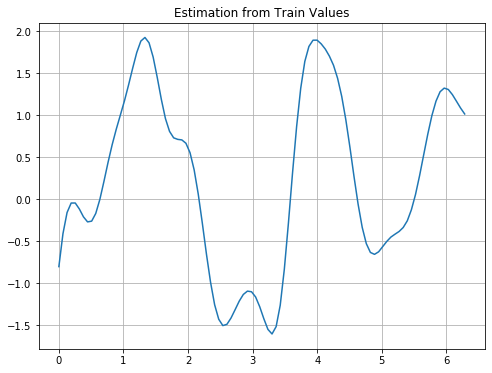

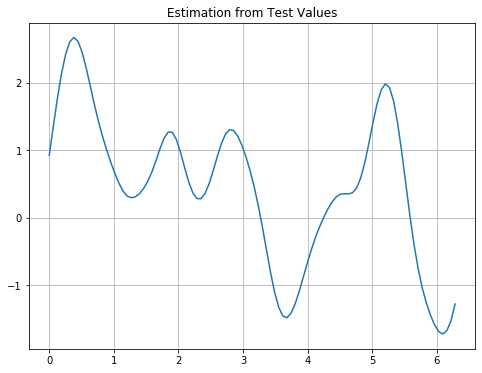

In [43]:
def kernel(a, b, param=0.1):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)
K_ss = kernel(x_train, x_train)
L = tf.cholesky(K_ss + 1e-6*tf.eye(n))
dist = tfd.MultivariateNormalTriL(scale_tril=L)
feed_dict = {X: x_train, Y: y_train}
with tf.Session() as sess:
  estimatedFtn = sess.run(dist.sample(), feed_dict=feed_dict)
plt.figure(figsize=(8,6))
plt.plot(x_train.ravel(), estimatedFtn, '-')
plt.grid()
plt.title('Estimation from Train Values')
plt.show()

# Run it for the testing pointers
test_feed_dict = {X: x_test, Y: y_test}
with tf.Session() as sess:
  estFtn_test = sess.run(dist.sample(), feed_dict=test_feed_dict)
plt.figure(figsize=(8,6))
plt.plot(x_test.ravel(), estFtn_test, '-')
plt.grid()
plt.title('Estimation from Test Values')
plt.show()